In [171]:
import requests
import json
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
from itertools import groupby

In [47]:
def get_data(city):
    
    base_url = 'https://api.worldweatheronline.com/premium/v1/past-weather.ashx'
    params = {
    "q":city,
    "date":"2019-07-01",
    "enddate":"2019-07-31",
    "tp":24,
    "key":'565b3fa2a99d45d7967190401191010',
    "format":'json'
    }
    
    r = requests.get(base_url, params=params)
    resp_dict = r.json()
    df = pd.DataFrame(resp_dict['data']['weather'])
    dict_tmp = resp_dict['data']['weather']
    dict_out=[dict(item, **{'location':city}) for item in dict_tmp]
    df['location'] = city
    return df, dict_out


In [179]:
locations = ['Tokyo','London','New York','Delhi','Shanghai','Mexico City', 'Karachi','Istanbul','Moscow','Paris','Bangalore','Seoul','Venice','Rome','Madrid','Cardiff','Toronto','Sydney','Berlin','Athens','Los Angeles','Seattle','Miami','Dubai','Hiroshima','Brussels','Budapest','Glasgow','Phoenix','Houston','Pittsburgh','New Orleans','Copenhagen','Zurich','Denver','Vancouver','Belfast','Lima','Santiago','Cairo','Nairobi','Panama City','Jakarta','Taipei','Bangkok','Auckland','Melbourne','Tijuana','Beijing','Kyoto','Chicago']

In [48]:
frames = {}
list_of_dict = []
locations = ['Tokyo','London','New York','Delhi','Shanghai','Mexico City', 'Karachi','Istanbul','Moscow','Paris','Bangalore','Seoul','Venice','Rome','Madrid','Cardiff','Toronto','Sydney','Berlin','Athens','Los Angeles','Seattle','Miami','Dubai','Hiroshima','Brussels','Budapest','Glasgow','Phoenix','Houston','Pittsburgh','New Orleans','Copenhagen','Zurich','Denver','Vancouver','Belfast','Lima','Santiago','Cairo','Nairobi','Panama City','Jakarta','Taipei','Bangkok','Auckland','Melbourne','Tijuana','Beijing','Kyoto','Chicago']

for loc in locations:
    dfout,dictout =  get_data(loc)
    frames['df_{}'.format(loc)] = dfout
    list_of_dict.append(dictout)

## Manual Development of Data Table.....

In [172]:
infile = open('raw_output_listdict','rb')
list_of_dict = pickle.load(infile)
infile.close()

In [173]:
newlist = []
your_keys = ['date','location','avgtempF','maxtempF','mintempF']

for i in range(len(list_of_dict)):
    for j in range(len(list_of_dict[i])):
        dict_you_want = {your_key: list_of_dict[i][j][your_key] for your_key in your_keys}
        newlist.append(dict_you_want)

In [174]:
numeric_keys = ['avgtempF','maxtempF','mintempF']
for dicts in newlist: 
    for keys in numeric_keys: 
        dicts[keys] = int(dicts[keys]) 

In [226]:
grouped_list = []
import statistics as stats
for k,v in groupby(newlist,key=lambda x:x['location']):
    grouplist = list(v)
    grouped_list.append({'location':k,'maxtempF':max(d['maxtempF'] for d in grouplist),'mintempF':min(d['mintempF'] for d in grouplist),'avgtempF':stats.mean(d['avgtempF'] for d in grouplist)})

In [227]:
grouped_list

[{'location': 'Tokyo',
  'maxtempF': 93,
  'mintempF': 59,
  'avgtempF': 79.35483870967742},
 {'location': 'London', 'maxtempF': 95, 'mintempF': 53, 'avgtempF': 71},
 {'location': 'New York',
  'maxtempF': 101,
  'mintempF': 61,
  'avgtempF': 85.7741935483871},
 {'location': 'Delhi',
  'maxtempF': 125,
  'mintempF': 78,
  'avgtempF': 97.38709677419355},
 {'location': 'Shanghai',
  'maxtempF': 100,
  'mintempF': 60,
  'avgtempF': 86.58064516129032},
 {'location': 'Mexico City',
  'maxtempF': 85,
  'mintempF': 55,
  'avgtempF': 69.61290322580645},
 {'location': 'Karachi',
  'maxtempF': 95,
  'mintempF': 76,
  'avgtempF': 88.25806451612904},
 {'location': 'Istanbul',
  'maxtempF': 89,
  'mintempF': 65,
  'avgtempF': 79.74193548387096},
 {'location': 'Moscow',
  'maxtempF': 84,
  'mintempF': 48,
  'avgtempF': 68.06451612903226},
 {'location': 'Paris',
  'maxtempF': 105,
  'mintempF': 56,
  'avgtempF': 75.7741935483871},
 {'location': 'Bangalore',
  'maxtempF': 89,
  'mintempF': 68,
  'avgt

In [177]:
max_temps = []
min_temps = []
avg_temps = []
for loc in grouped_list:
    max_temps.append(loc['maxtempF'])
    min_temps.append(loc['mintempF'])
    avg_temps.append(loc['avgtempF'])

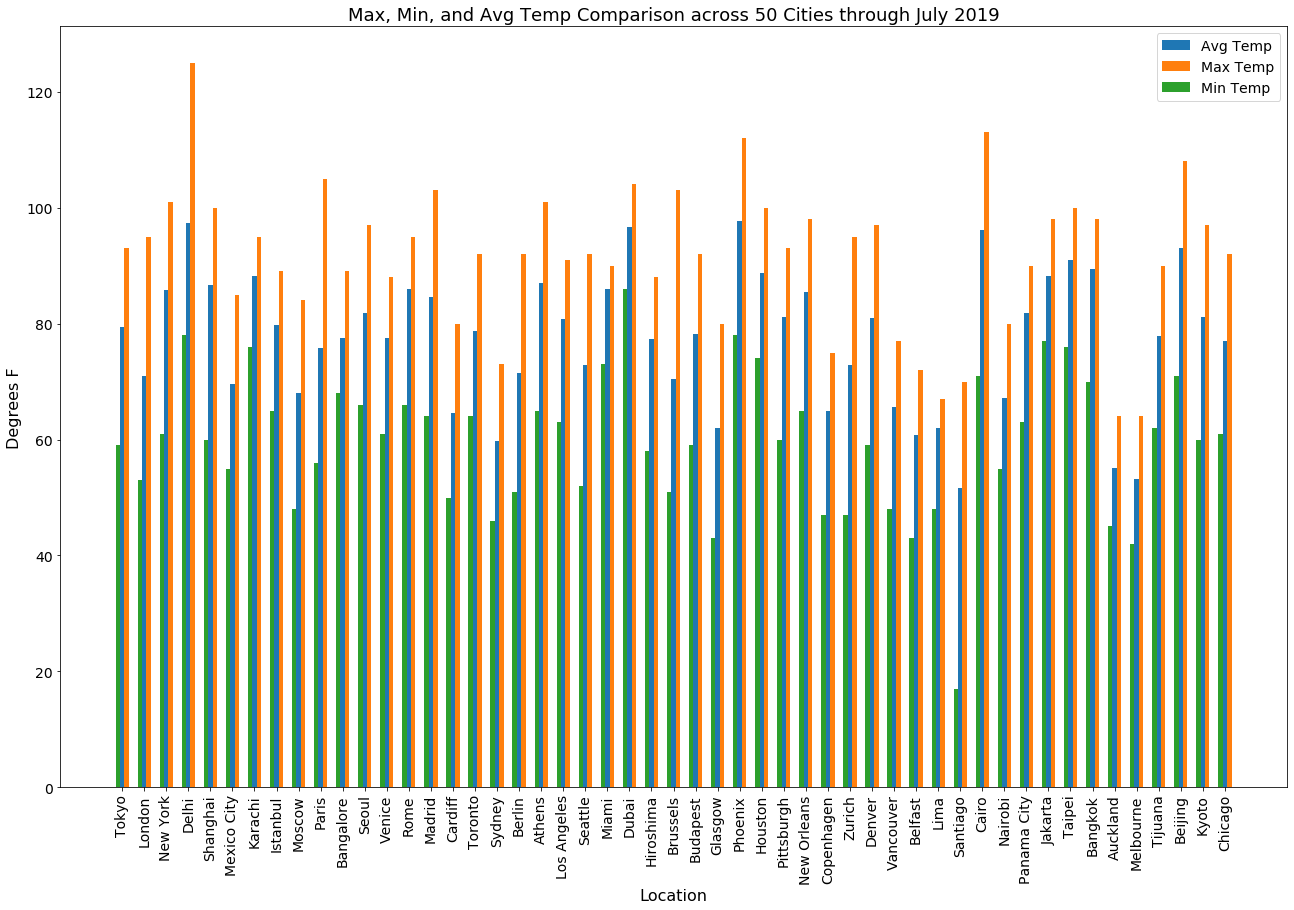

In [180]:
plt.figure(figsize=(22,14))
ind = list(range(len(locations)))
width = 0.20
ticks_ind = [x for x in ind] 


plt.xticks(ticks_ind, locations,rotation = 90,fontsize=14)
plt.xlabel('Location',fontsize=16)
plt.ylabel('Degrees F',fontsize=16)
plt.yticks(fontsize=14)
plt.bar(ind,avg_temps,width=width,label='Avg Temp')

res_ind = [x + width for x in ind] 
plt.bar(res_ind, max_temps, width=width,label='Max Temp')

res_ind2 = [x - width for x in ind]
plt.bar(res_ind2, min_temps, width=width,label='Min Temp')

plt.title('Max, Min, and Avg Temp Comparison across 50 Cities through July 2019', fontsize=18)
plt.legend(fontsize=14)

<BarContainer object of 51 artists>

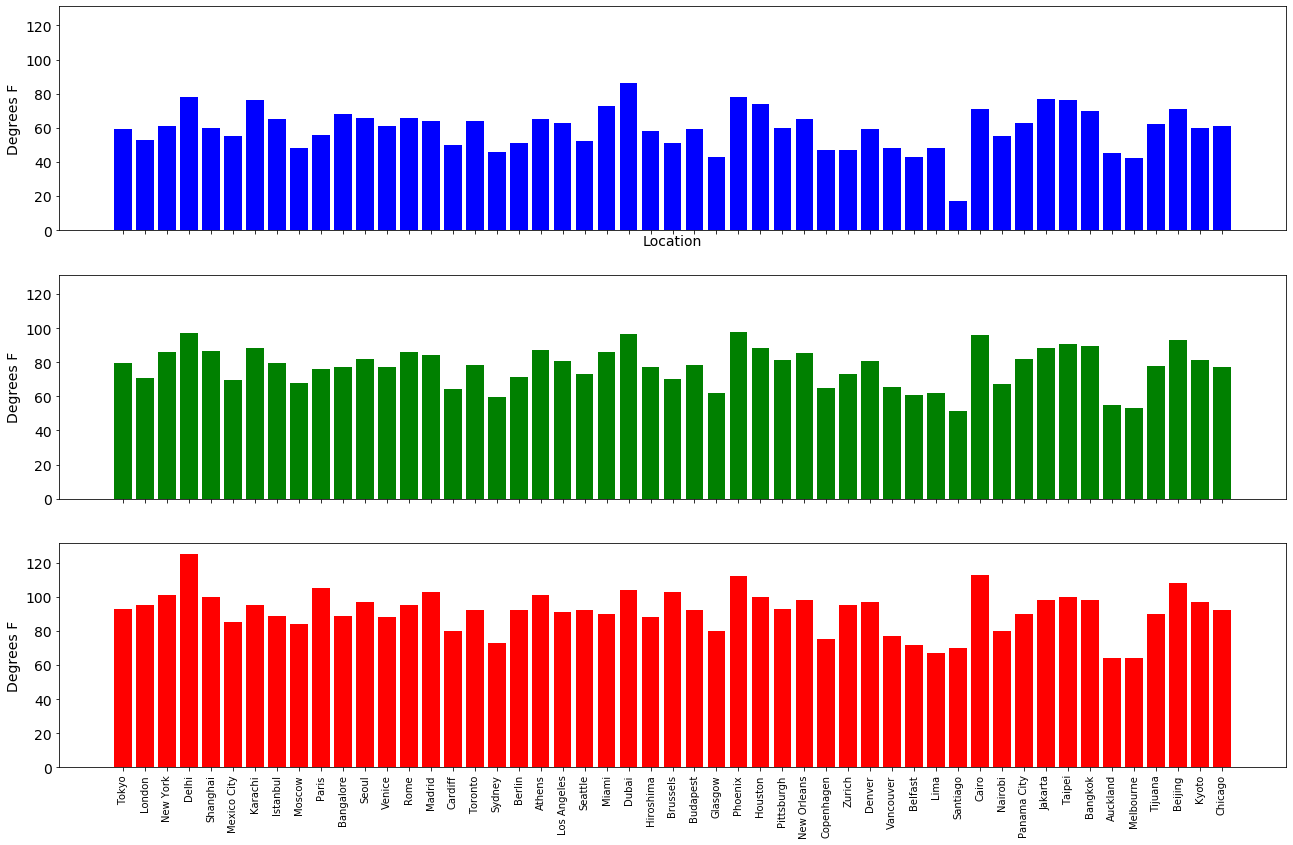

In [181]:
fig, axs = plt.subplots(3,figsize=(22,14),sharex=True, sharey=True)
plt.setp(plt.xticks()[1], rotation=90)
for ax in axs:
    ax.set_ylabel('Degrees F',fontsize=14)
    ax.tick_params(axis="y", labelsize=14)
axs[0].set_xlabel('Location',fontsize=14)
axs[0].bar(locations, min_temps, color='b')
axs[1].bar(locations, avg_temps, color = 'g')
axs[2].bar(locations, max_temps, color ='r')



In [192]:
lower_whisk = []
upper_whisk = []
for i in range(len(avg_temps)):
    lower_whisk.append(avg_temps[i]-min_temps[i])
    upper_whisk.append(max_temps[i]-avg_temps[i])

Text(0.5, 1.0, 'Max, Min, and Avg Temp Comparison across 50 Cities through July 2019')

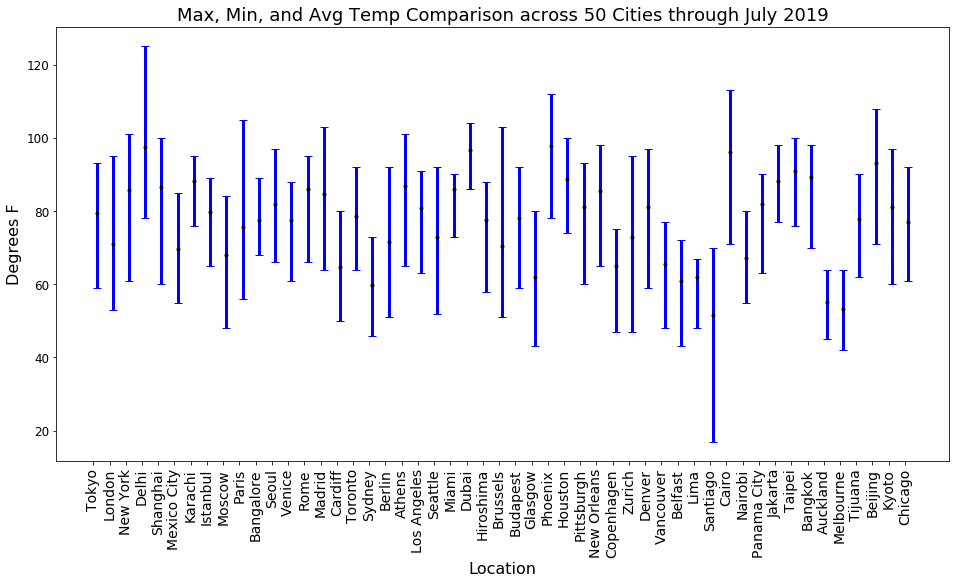

In [229]:
# plt.errorbar(res_ind, avg_temps, fmt='ok', lw=3)
plt.figure(figsize=(16,8))
plt.xticks(range(len(locations)), locations,rotation = 90,fontsize=14)
plt.errorbar(res_ind, avg_temps, [lower_whisk,upper_whisk],
             fmt='.k', capsize=4,ecolor='blue', lw=3)

plt.yticks(fontsize=12)
plt.xlabel('Location', fontsize =16)
plt.ylabel('Degrees F',fontsize = 16)
plt.title('Max, Min, and Avg Temp Comparison across 50 Cities through July 2019', fontsize=18)

## Pandas Implementation for Data Table and Summaries

In [228]:
df_combined = pd.concat(frames.values(), ignore_index=True)
df_combined['maxtempF'] = pd.to_numeric(df_combined['maxtempF'])
df_combined['mintempF'] = pd.to_numeric(df_combined['mintempF'])
df_combined['avgtempF'] = round(pd.to_numeric(df_combined['avgtempF']),2)
df_combined.groupby('location').agg({'maxtempF':max,'mintempF':'min','avgtempF':'mean'})

NameError: name 'frames' is not defined

<BarContainer object of 1581 artists>

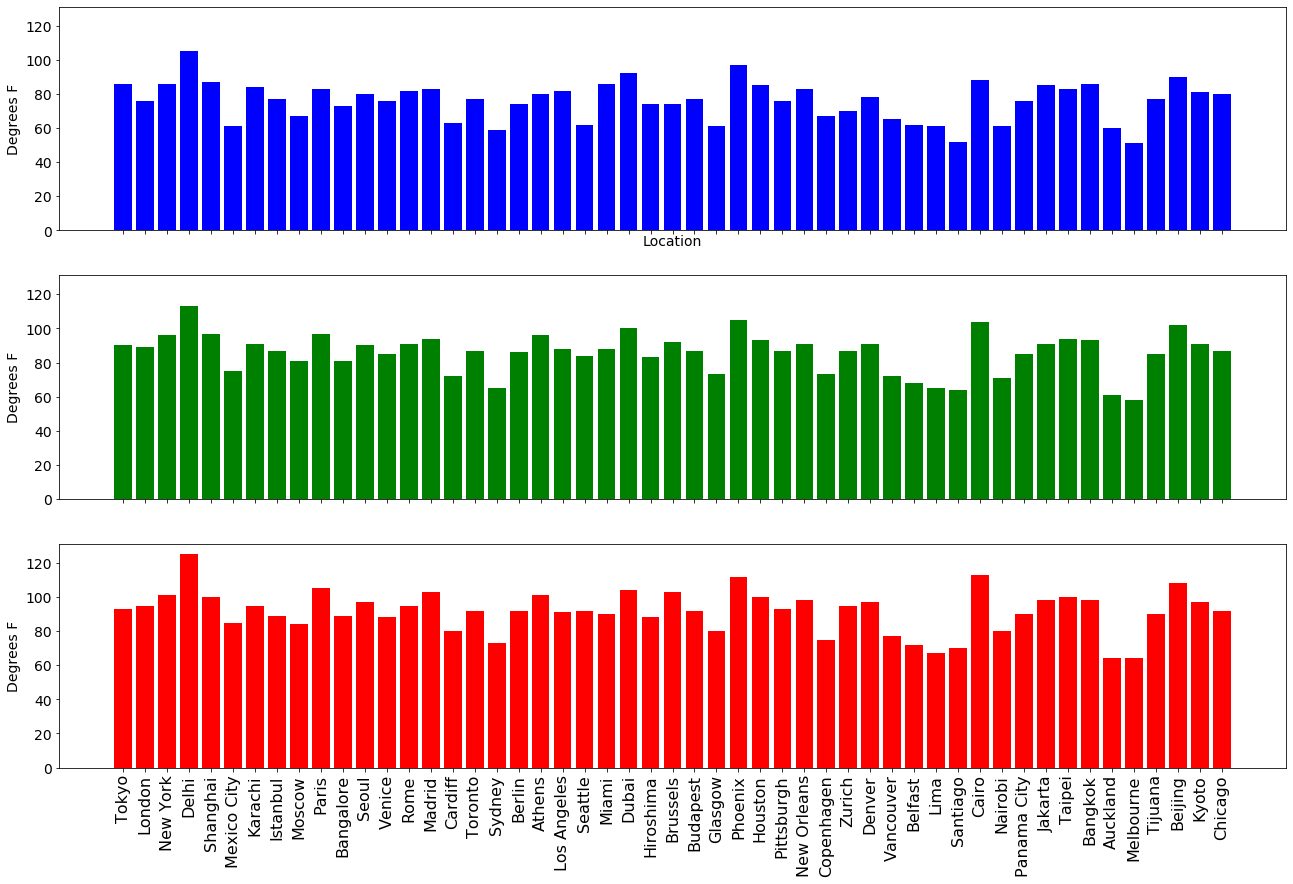

In [243]:
# df_combined.plot(x='location',y='mintempF',kind='bar',figsize=(22,14))
# df_combined_max = df_combined.sort_values(by='maxtempF',ascending=False)

fig, axs = plt.subplots(3,figsize=(22,14),sharex=True, sharey=True)
plt.setp(plt.xticks()[1], rotation=90)
for ax in axs:
    ax.set_ylabel('Degrees F',fontsize=14)
    ax.tick_params(axis="y", labelsize=14)
axs[0].set_xlabel('Location',fontsize=14)
axs[0].bar(x='location',height='mintempF',data=df_combined, color='b')
axs[1].bar(x='location',height='avgtempF',data=df_combined, color = 'g')
axs[2].bar(x='location',height='maxtempF',data=df_combined, color ='r')


## exercise 2

In [66]:
from bs4 import BeautifulSoup, NavigableString, Tag

In [67]:
URL = "https://www.summet.com/dmsi/html/codesamples/addresses.html"
r = requests.get(URL) 
  
soup = BeautifulSoup(r.content, "html.parser") 
data = soup.find_all("li")
table = soup.find("table")

In [68]:
data

[<li>Cecilia Chapman<br/>711-2880 Nulla St.<br/>Mankato Mississippi 96522<br/>(257) 563-7401</li>,
 <li>Iris Watson<br/>P.O. Box 283 8562 Fusce Rd.<br/>Frederick Nebraska 20620<br/>(372) 587-2335</li>,
 <li>Celeste Slater<br/>606-3727 Ullamcorper. Street<br/>Roseville NH 11523<br/>(786) 713-8616</li>,
 <li>Theodore Lowe<br/>Ap #867-859 Sit Rd.<br/>Azusa New York 39531<br/>(793) 151-6230</li>,
 <li>Calista Wise<br/>7292 Dictum Av.<br/>San Antonio MI 47096<br/>(492) 709-6392</li>,
 <li>Kyla Olsen<br/>Ap #651-8679 Sodales Av.<br/>Tamuning PA 10855<br/>(654) 393-5734</li>,
 <li>Forrest Ray<br/>191-103 Integer Rd.<br/>Corona New Mexico 08219<br/>(404) 960-3807</li>,
 <li>Hiroko Potter<br/>P.O. Box 887 2508 Dolor. Av.<br/>Muskegon KY 12482<br/>(314) 244-6306</li>,
 <li>Nyssa Vazquez<br/>511-5762 At Rd.<br/>Chelsea MI 67708<br/>(947) 278-5929</li>,
 <li>Lawrence Moreno<br/>935-9940 Tortor. Street<br/>Santa Rosa MN 98804<br/>(684) 579-1879</li>,
 <li>Ina Moran<br/>P.O. Box 929 4189 Nunc Road<b

In [69]:
data[1].find("br").previous_sibling

'Iris Watson'

In [70]:
addr_list=[]
for item in data:
    count = 0
    addr_split = []
    for br in item.findAll('br'):
        next_s = br.nextSibling
        if count == 0:
            prev_s = br.previous_sibling
            addr_split.append(prev_s)
            count+=1
        elif count == 1:
            addr_info = next_s.split()
            for str_item in addr_info:
                addr_split.append(str_item)
#             curr_list = 
#             cityinfo.append(addr_split[0])
#             stateinfo.append(addr_split[1])
#             zipinfo.append(addr_split[2])
            count+=1
        else:
            addr_split.append(next_s)
            addr_list.append(addr_split)
            
        
        

In [71]:
for addr in addr_list:
    if len(addr) > 5:
        print(addr)

['Theodore Lowe', 'Azusa', 'New', 'York', '39531', '(793) 151-6230']
['Calista Wise', 'San', 'Antonio', 'MI', '47096', '(492) 709-6392']
['Forrest Ray', 'Corona', 'New', 'Mexico', '08219', '(404) 960-3807']
['Lawrence Moreno', 'Santa', 'Rosa', 'MN', '98804', '(684) 579-1879']
['Aaron Hawkins', 'Erie', 'Rhode', 'Island', '24975', '(660) 663-4518']
['Melvin Porter', 'Bandera', 'South', 'Dakota', '45149', '(959) 119-8364']
['Joan Romero', 'Idaho', 'Falls', 'Ohio', '19253', '(248) 675-4007']
['Leilani Boyer', 'San', 'Bernardino', 'ND', '09289', '(570) 873-7090']
['Bryar Pitts', 'Fort', 'Dodge', 'GA', '20783', '(717) 450-4729']
['Rahim Henderson', 'Daly', 'City', 'Ohio', '90255', '(453) 391-4650']
['Adria Russell', 'Miami', 'Beach', 'North', 'Dakota', '58563', '(516) 745-4496']
['Sheila Mcintosh', 'Santa', 'Monica', 'FL', '30309', '(746) 679-2470']
['Christian Emerson', 'Rolling', 'Hills', 'Georgia', '92358', '(490) 936-4694']
['Nevada Ware', 'Green', 'Bay', 'Indiana', '19759', '(985) 834-8

In [72]:
class Person():
    def __init__(self,lname,fname,cty,st,zpcd,tele):
        self.last_name = lname
        self.first_name = fname
        self.city = cty
        self.state = st
        self.zip = zpcd
        self.phone = tele

    
    def get_name(self):
        return(self.last_name, self.first_name)
    
    def get_city(self):
        return(self.city)
    
    def get_state(self):
        return(self.state)
    
    def get_phone(self):
        return(self.phone)
    
    def get_zip(self):
        return(self.zip)
    
    def set_state(self,x):
        self.state = x
        
    
    def get_full_info(self):
        print('Last Name:', self.get_name()[0]+',','First Name:', self.get_name()[1])
        print('City:', self.get_city()+",",'State:', self.get_state()+",",'Zip:', self.get_zip())
        print('Phone', self.get_phone())
        print('\n')

In [106]:
objs = []
for j in addr_list:
    names = j[0].split()
    lname = names[1]
    fname = names[0]
    zpcd = j[-2]
    phn = j[-1]
    cty = j[1]
    ste = j[-3]
    
    if len(j) < 5: 
        cty = j[1]
        ste = j[2]
    else:
        if j[1] in ('New','San','Santa','Miami','Rolling','Green','Idaho','Villa','Lake','Walla','Asbury','Pass','Grand','Fort','South','Yorba','Bell','West','Rocky') :
            cty = j[1]+" "+j[2]
            if j[3] in ('New','Rhode','South','North'):
                ste = j[3] + " " + j[4]
            else:
                ste = j[3]
        elif j[2] in ('New','Rhode','South','North'):
            ste = j[2] + " " + j[3]
        elif len(j) > 6:
            cty = j[1]+" "+j[2] + " " + j[3]
            if j[4] in ('New','Rhode','South','North'):
                ste = j[4] + " " + j[5]
            else:
                ste = j[4]
    
    objs.append(Person(lname,fname,cty,ste,zpcd,phn))

In [107]:
for i in objs:
    i.get_full_info()

Last Name: Chapman, First Name: Cecilia
City: Mankato, State: Mississippi, Zip: 96522
Phone (257) 563-7401


Last Name: Watson, First Name: Iris
City: Frederick, State: Nebraska, Zip: 20620
Phone (372) 587-2335


Last Name: Slater, First Name: Celeste
City: Roseville, State: NH, Zip: 11523
Phone (786) 713-8616


Last Name: Lowe, First Name: Theodore
City: Azusa, State: New York, Zip: 39531
Phone (793) 151-6230


Last Name: Wise, First Name: Calista
City: San Antonio, State: MI, Zip: 47096
Phone (492) 709-6392


Last Name: Olsen, First Name: Kyla
City: Tamuning, State: PA, Zip: 10855
Phone (654) 393-5734


Last Name: Ray, First Name: Forrest
City: Corona, State: New Mexico, Zip: 08219
Phone (404) 960-3807


Last Name: Potter, First Name: Hiroko
City: Muskegon, State: KY, Zip: 12482
Phone (314) 244-6306


Last Name: Vazquez, First Name: Nyssa
City: Chelsea, State: MI, Zip: 67708
Phone (947) 278-5929


Last Name: Moreno, First Name: Lawrence
City: Santa Rosa, State: MN, Zip: 98804
Phone (

In [108]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [109]:
for item in objs:
    if item.get_state() in us_state_abbrev.keys():
        abbr = us_state_abbrev.get(item.get_state())
        item.set_state(abbr)
    

In [112]:
states_list = []
for i in objs:
    states_list.append(i.get_state())

In [134]:
unique_states = list(set(states_list))

In [144]:
result = sorted([(x, states_list.count(x)) for x in unique_states], key=lambda y: y[1],reverse=True)

<BarContainer object of 48 artists>

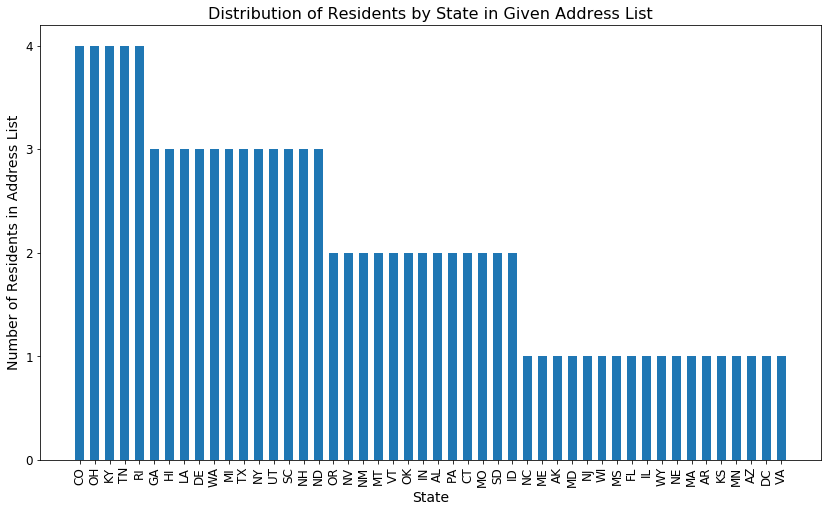

In [164]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure(figsize = (14,8)).gca()
plt.xticks(rotation=90,fontsize=12)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.yticks(fontsize=12)
plt.xlabel('State', fontsize =14)
plt.ylabel('Number of Residents in Address List',fontsize = 14)
plt.title('Distribution of Residents by State in Given Address List', fontsize =16)
plt.bar(*zip(*result),width = 0.6)